In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from skimage.io import imread
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['sample_submission.csv', 'test', 'train', 'train_ship_segmentations.csv']


In [2]:
train = os.listdir('../input/train')
print(len(train))

test = os.listdir('../input/test')
print(len(test))

1258
917


In [3]:
submission = pd.read_csv('../input/sample_submission.csv')
submission.head()

,ImageId,EncodedPixels
0,00002bd58.jpg,1 2
1,00015efb6.jpg,1 2
2,00023d5fc.jpg,1 2
3,000367c13.jpg,1 2
4,0008ca6e9.jpg,1 2


In [4]:
# ref: https://www.kaggle.com/paulorzp/run-length-encode-and-decode
def rle_decode(mask_rle, shape=(768, 768)):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T  # Needed to align to RLE direction

In [5]:
masks = pd.read_csv('../input/train_ship_segmentations.csv')
masks.head()

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...


Number of Boats :  3

Mask  0  =  367981 1 368747 4 369513 6 370280 8 371049 8 371817 9 372586 8 373355 8 374124 8 374892 9 375661 8 376430 8 377199 6 377967 4 378736 1
Mask  1  =  232354 5 233114 13 233874 21 234634 29 235394 38 236154 46 236914 54 237674 62 238438 66 239206 66 239974 66 240742 67 241511 66 242279 66 243047 66 243815 66 244583 66 245351 66 246119 67 246887 67 247656 66 248424 66 249192 62 249960 55 250728 48 251496 41 252264 33 253033 25 253801 18 254569 11 255337 4
Mask  2  =  234666 7 235434 14 236202 14 236970 14 237738 14 238505 15 239273 15 240041 15 240809 15 241585 7


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Mask Test [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


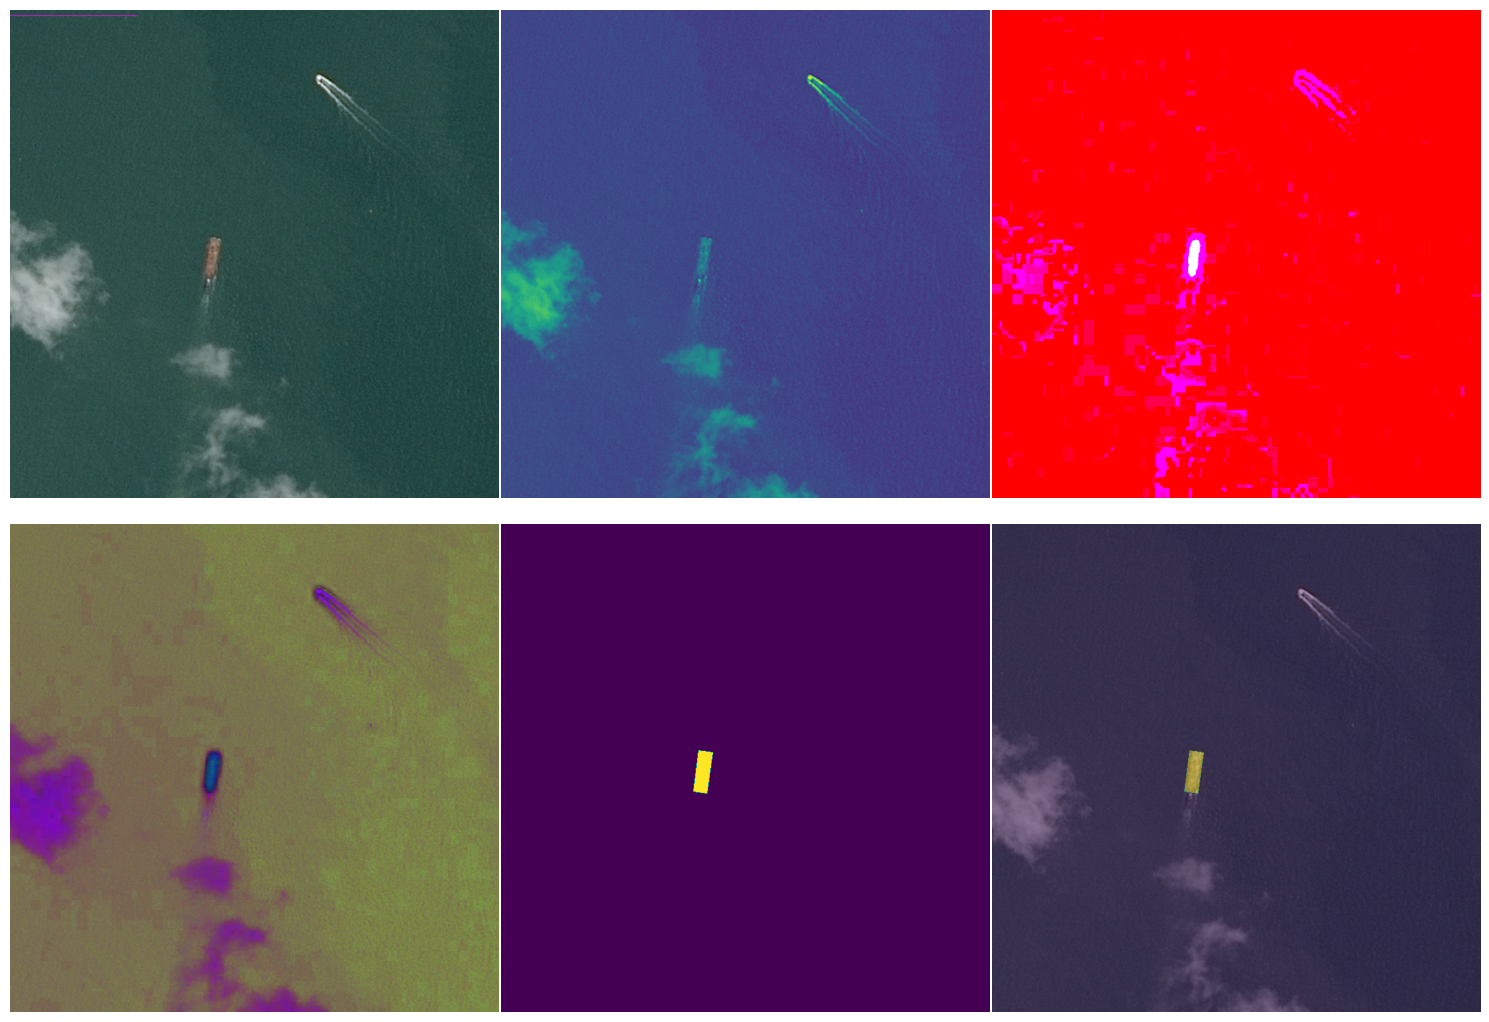

In [107]:
ImageId = '00b0fa633.jpg'

import cv2

img = imread('../input/train/' + ImageId)
img_masks = masks.loc[masks['ImageId'] == ImageId, 'EncodedPixels'].tolist()

all_m = masks.loc[masks['ImageId'] == ImageId, 'EncodedPixels']
number_of_boats = all_m.size
print("Number of Boats : ", number_of_boats)
print("")
mask_0 = all_m.iloc[0]
mask_1 = all_m.iloc[1]
mask_2 = all_m.iloc[2]

mask_array = np.array(number_of_boats)
for i in range(number_of_boats):
    print("Mask ", i, " = ", all_m.iloc[i])

#array = np.zeros([100, 200], dtype=np.uint8)
#test = np.zeros((768, 768))
test = np.array(img)
#print(test.shape)
#print(test[10, 10]) #RGB VALUE

for i in range(200):
    test[10, i] = [255, 10, 255]



from skimage import color
img1 = color.rgb2gray( img )
img2 = color.rgb2lab( img )
img3 = color.rgb2hsv( img )

# Take the individual ship masks and create a single mask array for all ships
mask_test = np.zeros((768, 768))
for mask in img_masks:
    mask_test += rle_decode(all_m.iloc[1])

print("Mask Test", mask_test)

ret, thresh = cv2.threshold(mask_test, 50, 255, cv2.THRESH_BINARY)
M = cv2.moments(thresh)



all_masks = np.zeros((768, 768))
#for mask in img_masks:
#    all_masks += rle_decode(mask)

d = np.angle(all_masks)
#print(d)
#print(img3)

fig, axarr = plt.subplots(2, 3, figsize=(15, 11))
axarr[0][0].axis('off')
axarr[0][1].axis('off')
axarr[0][2].axis('off')
axarr[1][0].axis('off')
axarr[1][1].axis('off')
axarr[1][2].axis('off')
axarr[0][0].imshow(test)
#axarr[0][0].imshow()
axarr[0][1].imshow(img1)
axarr[0][2].imshow(img2)
axarr[1][0].imshow(img3)
axarr[1][1].imshow(mask_test)
axarr[1][2].imshow(img)
axarr[1][2].imshow(mask_test, alpha=0.4)
plt.tight_layout(h_pad=0.1, w_pad=0.2)
plt.show()

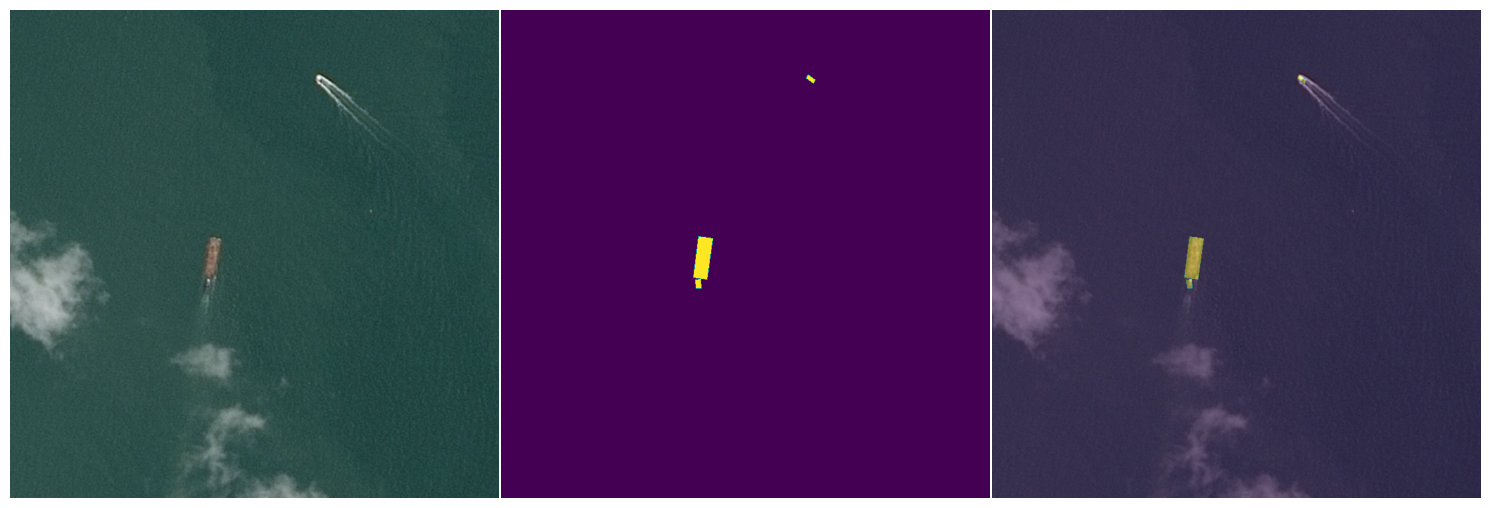

In [7]:
ImageId = '00b0fa633.jpg'

img = imread('../input/train/' + ImageId)
img_masks = masks.loc[masks['ImageId'] == ImageId, 'EncodedPixels'].tolist()

# Take the individual ship masks and create a single mask array for all ships
all_masks = np.zeros((768, 768))
for mask in img_masks:
    all_masks += rle_decode(mask)

fig, axarr = plt.subplots(1, 3, figsize=(15, 40))
axarr[0].axis('off')
axarr[1].axis('off')
axarr[2].axis('off')
axarr[0].imshow(img)
axarr[1].imshow(all_masks)
axarr[2].imshow(img)
axarr[2].imshow(all_masks, alpha=0.4)
plt.tight_layout(h_pad=0.1, w_pad=0.2)
plt.show()

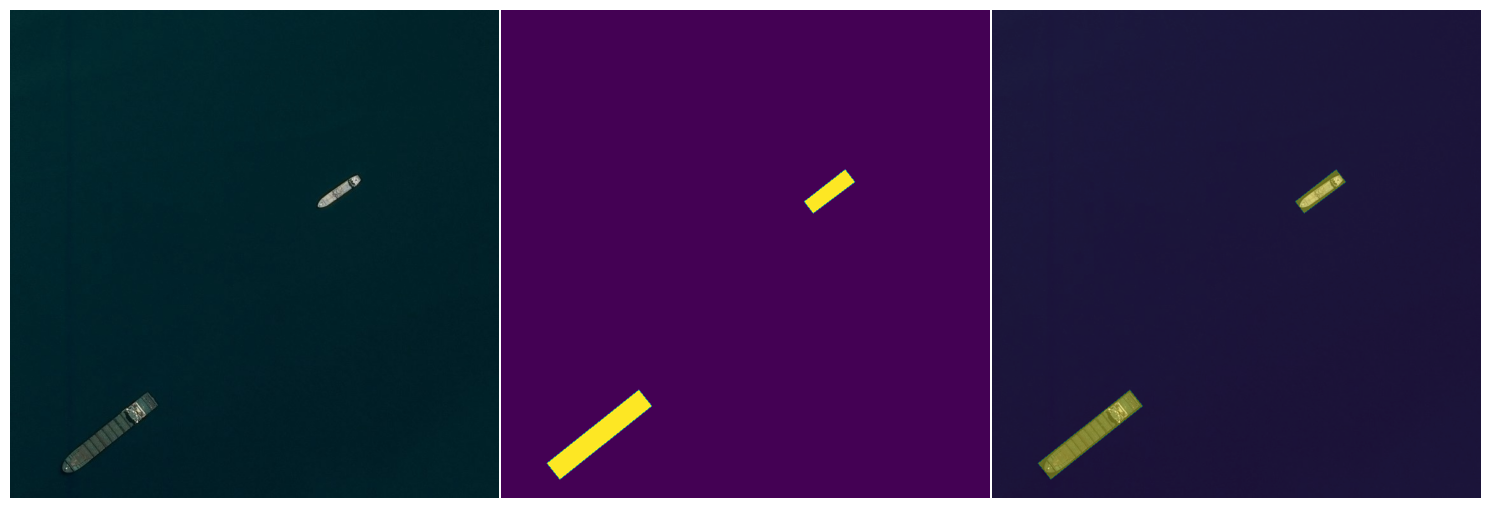

In [8]:
ImageId = '0005d01c8.jpg'

img = imread('../input/train/' + ImageId)
img_masks = masks.loc[masks['ImageId'] == ImageId, 'EncodedPixels'].tolist()

# Take the individual ship masks and create a single mask array for all ships
all_masks = np.zeros((768, 768))
for mask in img_masks:
    all_masks += rle_decode(mask)

fig, axarr = plt.subplots(1, 3, figsize=(15, 40))
axarr[0].axis('off')
axarr[1].axis('off')
axarr[2].axis('off')
axarr[0].imshow(img)
axarr[1].imshow(all_masks)
axarr[2].imshow(img)
axarr[2].imshow(all_masks, alpha=0.4)
plt.tight_layout(h_pad=0.1, w_pad=0.2)
plt.show()

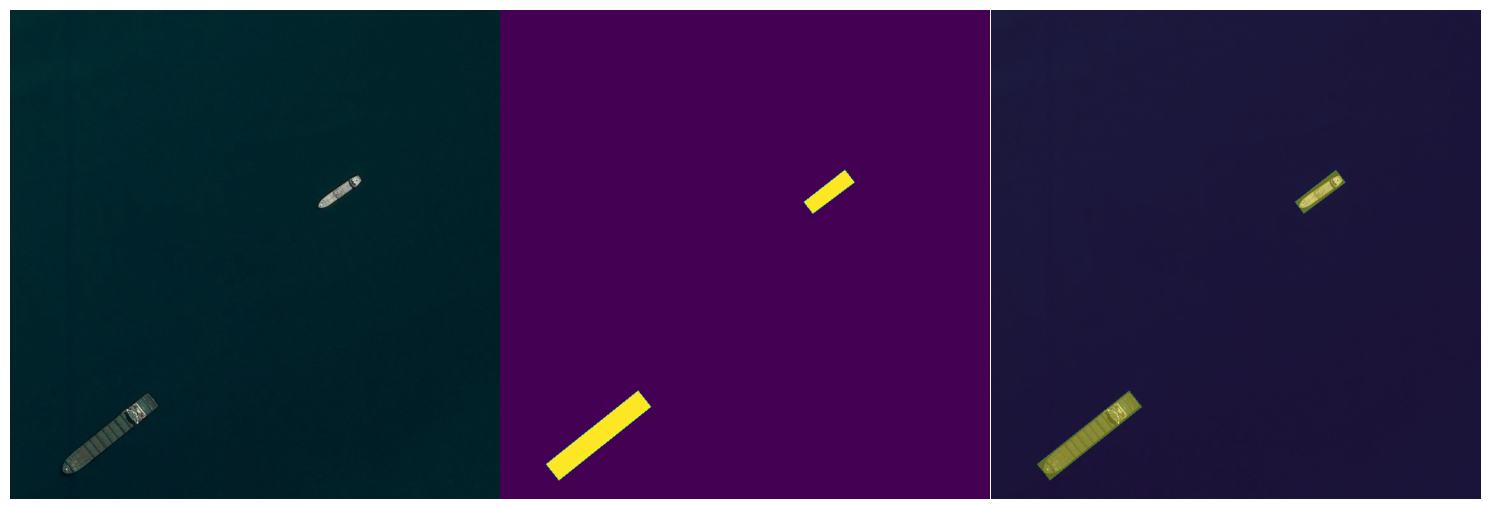

In [9]:
ImageId = '0005d01c8.jpg'

img = imread('../input/train/' + ImageId)
img_masks = masks.loc[masks['ImageId'] == ImageId, 'EncodedPixels'].tolist()

# Take the individual ship masks and create a single mask array for all ships
all_masks = np.zeros((768, 768))
for mask in img_masks:
    all_masks += rle_decode(mask)

fig, axarr = plt.subplots(1, 3, figsize=(15, 40))
axarr[0].axis('off')
axarr[1].axis('off')
axarr[2].axis('off')
axarr[0].imshow(img)
axarr[1].imshow(all_masks)
axarr[2].imshow(img)
axarr[2].imshow(all_masks, alpha=0.4)
plt.tight_layout(h_pad=0.1, w_pad=0.1)
plt.show()

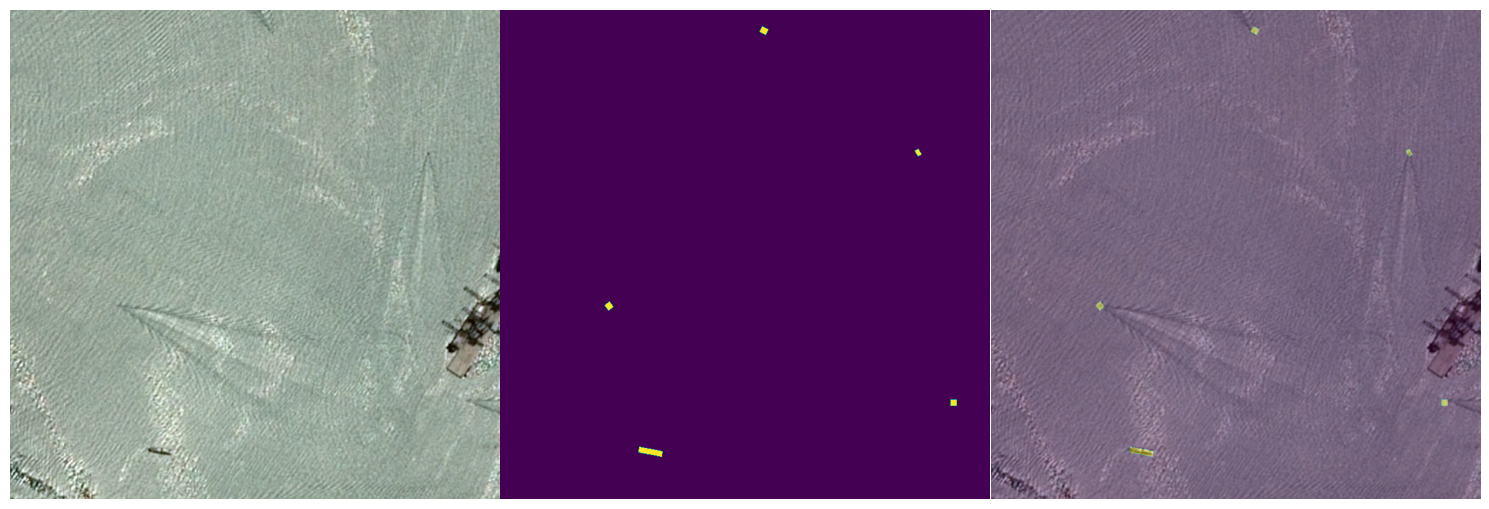

In [10]:
ImageId = '0177df615.jpg'

img = imread('../input/train/' + ImageId)
img_masks = masks.loc[masks['ImageId'] == ImageId, 'EncodedPixels'].tolist()

# Take the individual ship masks and create a single mask array for all ships
all_masks = np.zeros((768, 768))
for mask in img_masks:
    all_masks += rle_decode(mask)

fig, axarr = plt.subplots(1, 3, figsize=(15, 40))
axarr[0].axis('off')
axarr[1].axis('off')
axarr[2].axis('off')
axarr[0].imshow(img)
axarr[1].imshow(all_masks)
axarr[2].imshow(img)
axarr[2].imshow(all_masks, alpha=0.4)
plt.tight_layout(h_pad=0.1, w_pad=0.1)
plt.show()